# Visualização de Dados Acidentes por Pessoas em Rodovias Federais

## Perguntas: 

CONSULTAS SOBRE ACIDENTES EM RODOVIAS NO BRASIL, BLOCO 02:

POR PESSOA:
1. QUANTIDADE DE PESSOAS DISTINTAS REGISTRARAM ACIDENTES ENTRE 2007 E 2018
1. EVOLUCAO DE REGISTROS DE ACIDENTES POR ANO DE FABRICACAO DOS VEICULOS ENTRE 2007-2018
1. QUAIS DELEGACIAS REGISTRARAM MAIS OCORRENCIAS
1. REGISTROS DE OCORRENCIA ACIDENTES POR IDADE (E EVOLUCAO)
1. QUAIS MARCAS DE AUTOMOVEIS REGISTRARAM MAIS OCORRENCIAS ENTRE 2007-2018 (E EVOLUCAO)
1. QUAIS MUNICIPIOS REGISTRARAM MAIS OCORRENCIAS ENTRE 2007-2018 (E EVOLUCAO)
1. QUAIS NACIONALIDADES REGISTRARAM MAIS OCORRENCIAS ENTRE 2007-2018 (E EVOLUCAO)
1. QUAIS NATURALIDADES REGISTRARAM MAIS OCORRENCIAS ENTRE 2007-2018 (E EVOLUCAO)
1. QUAIS SEXOS REGISTRARAM MAIS OCORRENCIAS ENTRE 2007-2018 (E EVOLUCAO) (COMPARAR COM TIPO_ENVOLVIDO E QTD CNH POR SEXO)
1. QUAIS TIPOS DE PISTA REGISTRARAM MAIS OCORRENCIAS ENTRE 2007-2018 (E EVOLUCAO)
1. QUAIS TIPOS DE VEICULO REGISTRARAM MAIS OCORRENCIAS ENTRE 2007-2018 (E EVOLUCAO)
1. QUAIS TRACADOS DA VIA REGISTRARAM MAIS OCORRENCIAS ENTRE 2007-2018 (E EVOLUCAO)
1. QUAIS USO DE SOLO REGISTRARAM MAIS OCORRENCIAS ENTRE 2007-2018 (E EVOLUCAO)
1. HEATMAP DADOS GEOLOCALIZADOS 2017-2018

In [2]:
import pandas as pd, psycopg2, seaborn as sns, matplotlib.pyplot as plt, numpy as np, cufflinks as cf, folium

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import Fullscreen
from folium.plugins import MiniMap

In [4]:
%config IPCompleter.greedy=True
%matplotlib inline
cf.go_offline()
cf.getThemes()
cf.set_config_file(theme='pearl')

In [5]:
conn = psycopg2.connect("host=10.3.40.10 dbname=db_testes_diversos user=i3geoconsulta password=i3geoconsulta")
#conn = psycopg2.connect("host=10.3.40.10 dbname=db_testes_diversos user=python_api password=ipea001")
#c = conn.cursor()

## 1. Quantas Pessoas Distintas se Envolveram em Acidentes entre 2007 e 2018?

In [15]:
sql1 = """select date_part('year',acip.datahora) as ano,count(distinct(acip.pesid)) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
group by ano
order by ano asc;"""

df_aci_oco1 = pd.read_sql_query(sql1, con=conn)
df_aci_oco1['ano'] = df_aci_oco1['ano'].astype('int64')

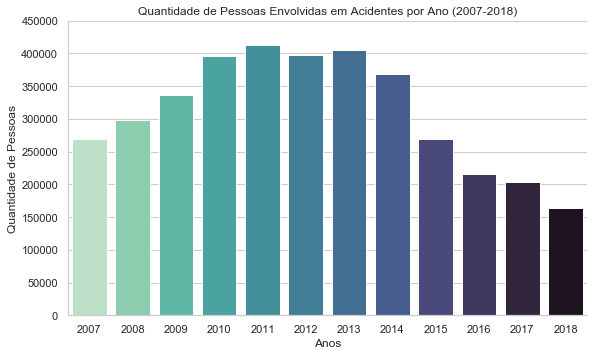

In [16]:
sns.set(style="whitegrid")
viz1 = sns.catplot(kind="bar", 
                   x='ano',
                   y='qtd_acidentes', 
                   data=df_aci_oco1, 
                   aspect=1.7,
                   palette="mako_r")
viz1.ax.set_title("Quantidade de Pessoas Envolvidas em Acidentes por Ano (2007-2018)")
viz1.set_axis_labels("Anos","Quantidade de Pessoas")
viz1.set(ylim=(0,450000))
#viz1.set_xticklabels(rotation=30)
viz1.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz1.svg")

### 1.1 Divergência Percentual de Pessoas Envolvidas em Acidentes em Relação ao Ano Anterior (2007-2018):

In [17]:
anterior = 0
atual = 1
for i in range(df_aci_oco1.shape[0]-1):
    if i == 0:
        df_aci_oco1["diverg_perc"]=df_aci_oco1["diverg_perc"].iloc[i] = 0
    else:
            perc=round((df_aci_oco1["qtd_acidentes"].loc[atual]-df_aci_oco1["qtd_acidentes"].loc[anterior])/(df_aci_oco1["qtd_acidentes"].loc[anterior])*100,2)
            anterior = anterior+1
            atual= atual+1
            df_aci_oco1["diverg_perc"].iloc[i] = perc

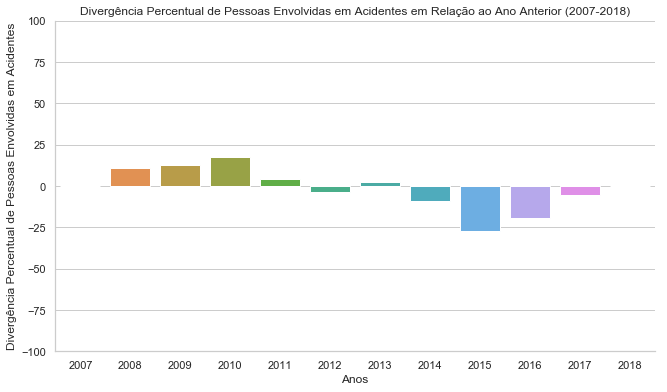

In [27]:
sns.set(style="whitegrid")
viz1_diverg = sns.catplot(kind="bar", 
                   x='ano',
                   y='diverg_perc', 
                   data=df_aci_oco1, 
                   aspect=1.7,
                         height=5.5)
viz1_diverg.ax.set_title("Divergência Percentual de Pessoas Envolvidas em Acidentes em Relação ao Ano Anterior (2007-2018)")
viz1_diverg.set_axis_labels("Anos","Divergência Percentual de Pessoas Envolvidas em Acidentes")
viz1_diverg.set(ylim=(-100,100))
#viz1.set_xticklabels(rotation=30)
viz1_diverg.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz1_diverg.svg")

## 2. Evolução de Registros de Acidentes por Ano de Fabricação dos Veículos entre 2007-2018:

In [76]:
sql2 = """select date_part('year',acip.datahora) as ano, acip.ano_fabricacao_veiculo as ano_fabricacao_veiculo, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
group by ano, ano_fabricacao_veiculo
order by ano asc;"""

df_aci_oco2 = pd.read_sql_query(sql2, con=conn)
df_aci_oco2['ano'] = df_aci_oco2['ano'].astype('int64')

### 2.1 Por Ano de Fabricação dos Veículos:

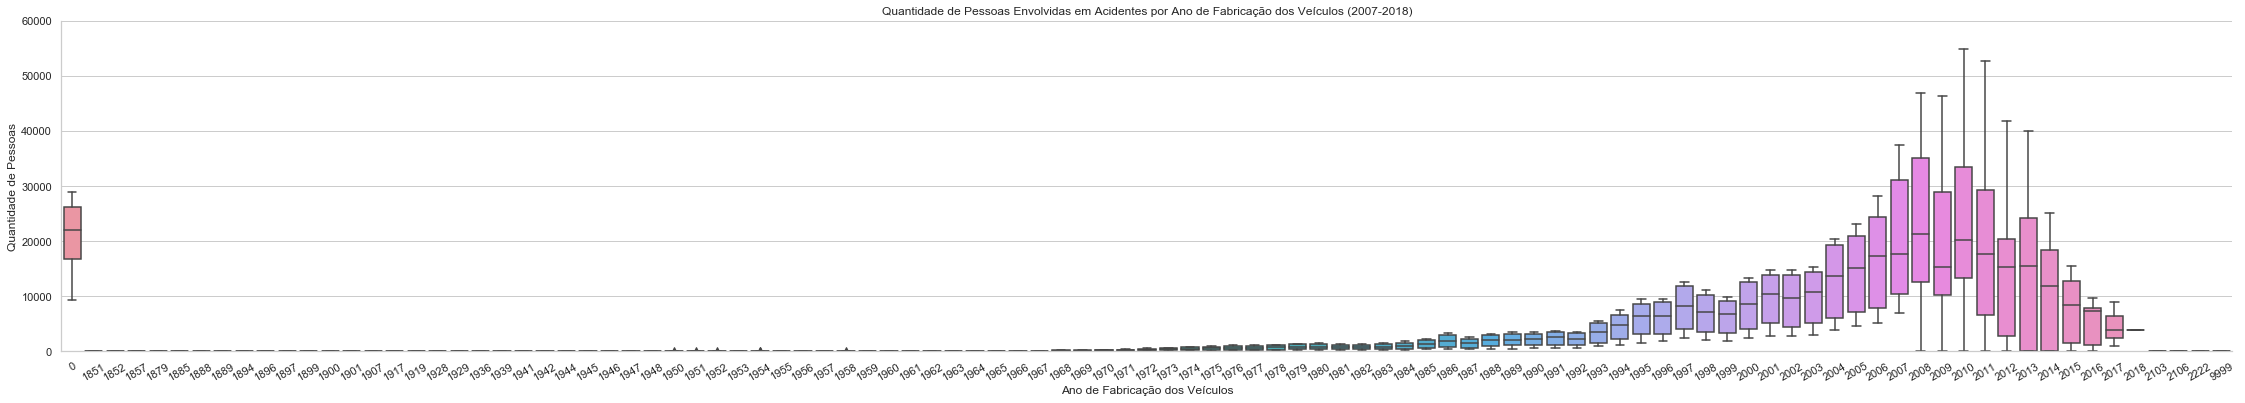

In [55]:
sns.set(style="whitegrid")
viz2_1 = sns.catplot(kind="box", 
                   x='ano_fabricacao_veiculo',
                   y='qtd_acidentes', 
                   data=df_aci_oco2, 
                   aspect=5.7,
                   height=5.5)
viz2_1.ax.set_title("Quantidade de Pessoas Envolvidas em Acidentes por Ano de Fabricação dos Veículos (2007-2018)")
viz2_1.set_axis_labels("Ano de Fabricação dos Veículos","Quantidade de Pessoas")
viz2_1.set(ylim=(0,60000))
viz2_1.set_xticklabels(rotation=30)
viz2_1.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz2_1.svg")

### 2.2 Evolução Por Ano de Fabricação de Veículos (2007-2018)

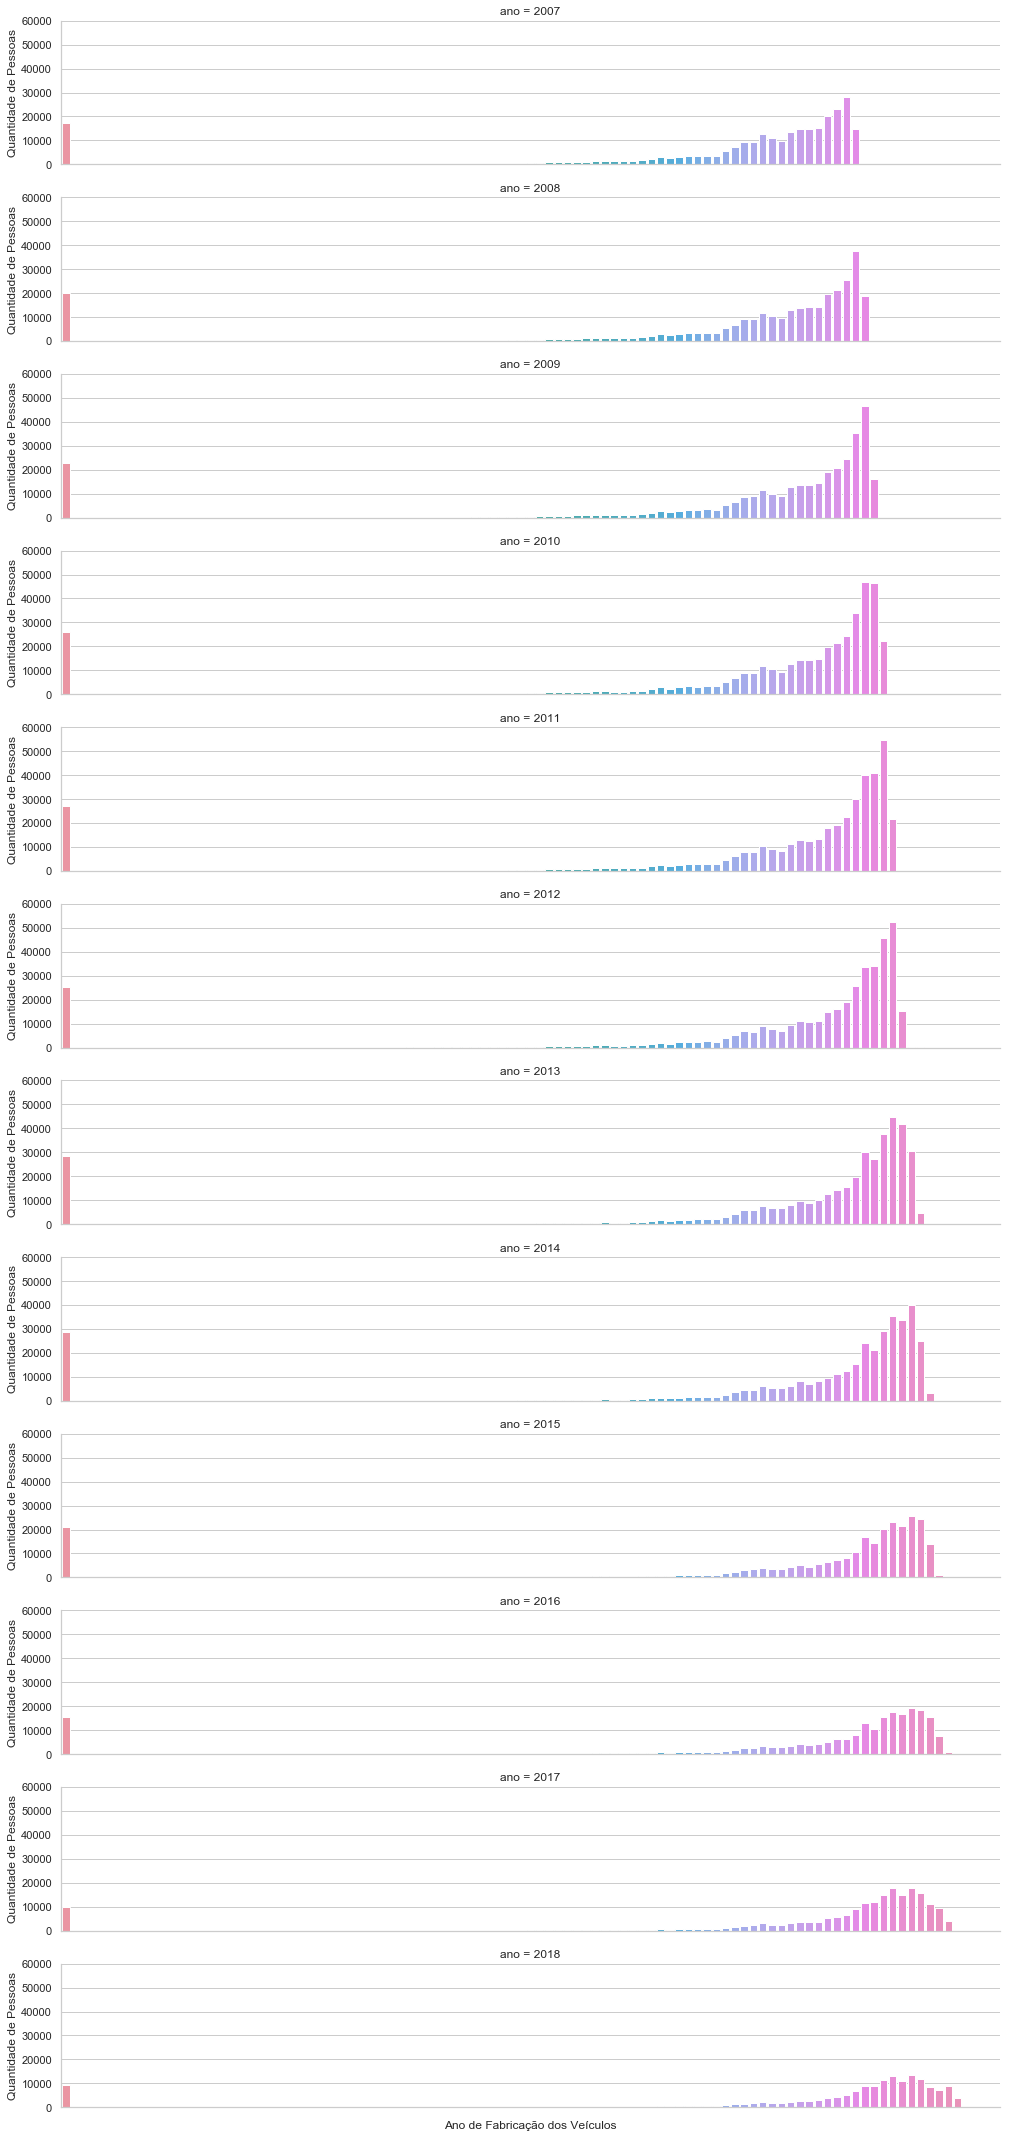

In [57]:
sns.set(style="whitegrid")
viz2_2 = sns.catplot(kind="bar", 
                   x='ano_fabricacao_veiculo',
                   y='qtd_acidentes', 
                   data=df_aci_oco2, 
                   row="ano",
                   aspect=5.7,
                   height=2.5)
#viz2_2.ax.set_title("Quantidade de Pessoas Envolvidas em Acidentes por Ano de Fabricação dos Veículos (2007-2018)")
viz2_2.set_axis_labels("Ano de Fabricação dos Veículos","Quantidade de Pessoas")
viz2_2.set(ylim=(0,60000))
viz2_2.set_xticklabels(rotation=30)
viz2_2.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz2_2.svg")

### 2.3 Evolução Por Ano de Fabricação de Veículos com Quantidade de Acidentes Acima da Média (2007-2018)

In [77]:
qt_abv_mean = df_aci_oco2.qtd_acidentes.mean()
df_aci_oco2_above_mean = df_aci_oco2.qtd_acidentes>qt_abv_mean
df_aci_oco2_above_mean = df_aci_oco2[df_aci_oco2_above_mean]

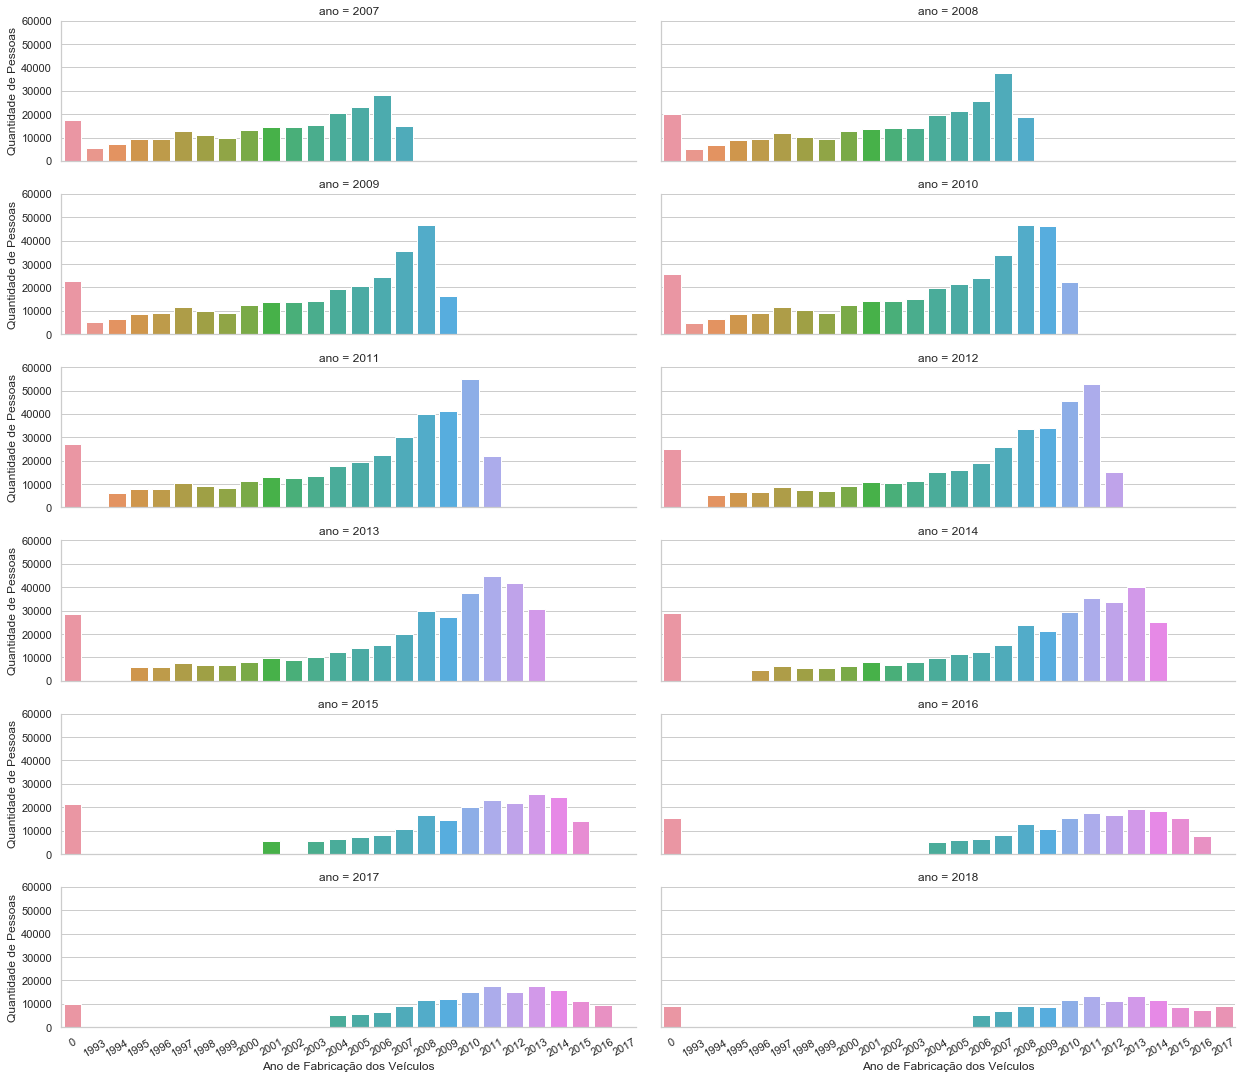

In [88]:
sns.set(style="whitegrid")
viz2_3 = sns.catplot(kind="bar", 
                   x='ano_fabricacao_veiculo',
                   y='qtd_acidentes', 
                   data=df_aci_oco2_above_mean, 
                   col="ano",
                   col_wrap=2,
                   aspect=3.5,
                   height=2.5)
#viz2_2.ax.set_title("Quantidade de Pessoas Envolvidas em Acidentes por Ano de Fabricação dos Veículos (2007-2018)")
viz2_3.set_axis_labels("Ano de Fabricação dos Veículos","Quantidade de Pessoas")
viz2_3.set(ylim=(0,60000))
viz2_3.set_xticklabels(rotation=30)
viz2_3.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz2_3.svg")

## 3. Quais Regionais e Delegacias Registraram mais Ocorrências de Pessoas Envolvidas em Acidentes?

In [115]:
sql3 = """select date_part('year',acip.datahora) as ano, acip.regional as regional, acip.delegacia as delegacia, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
where acip.delegacia is not null and acip.regional is not null
group by ano, regional, delegacia
order by ano asc;"""

df_aci_oco3 = pd.read_sql_query(sql3, con=conn)
df_aci_oco3['ano'] = df_aci_oco3['ano'].astype('int64')

### 3.1 Registros de Pessoas Envolvidas em Acidentes por Regionais

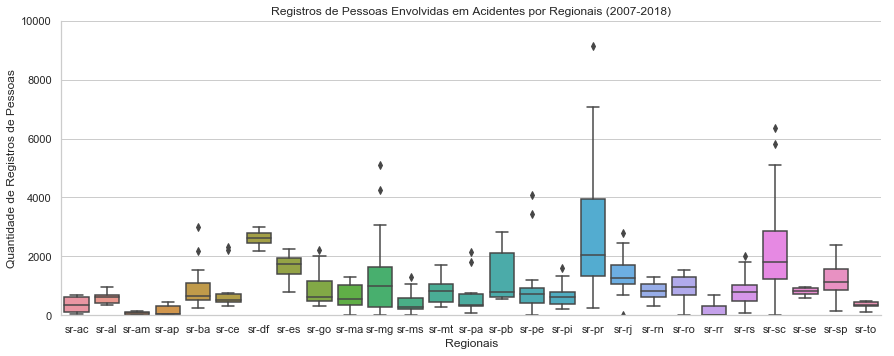

In [103]:
sns.set(style="whitegrid")
viz3_1 = sns.catplot(kind="box", 
                   x='regional',
                   y='qtd_acidentes', 
                   data=df_aci_oco3, 
                   aspect=2.5,
                   height=5)
viz3_1.ax.set_title("Registros de Pessoas Envolvidas em Acidentes por Regionais (2007-2018)")
viz3_1.set_axis_labels("Regionais","Quantidade de Registros de Pessoas")
viz3_1.set(ylim=(0,10000))
#viz3_1.set_xticklabels(rotation=30)
viz3_1.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz3_1.svg")

### 3.2 Registros de Pessoas Envolvidas em Acidentes por Delegacia

In [126]:
del_abv_mean = df_aci_oco3.qtd_acidentes.mean()
qt_ac_abv_mean = df_aci_oco3.qtd_acidentes>del_abv_mean
df_aci_oco3_abv_mean = df_aci_oco3[qt_ac_abv_mean]
df_aci_oco3_abv_mean = df_aci_oco3_abv_mean.sort_values(by="qtd_acidentes",ascending=False)

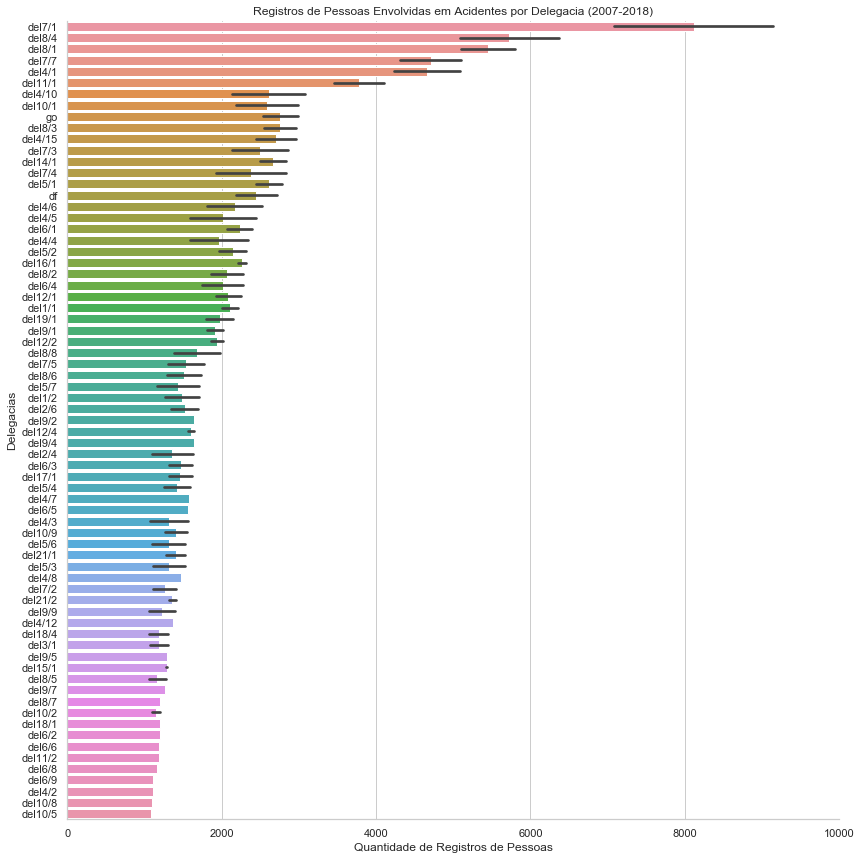

In [131]:
sns.set(style="whitegrid")
viz3_2 = sns.catplot(kind="bar", 
                   x='qtd_acidentes',
                   y='delegacia', 
                   data=df_aci_oco3_abv_mean, 
                   aspect=1.0,
                   height=12)
viz3_2.ax.set_title("Registros de Pessoas Envolvidas em Acidentes por Delegacia (2007-2018)")
viz3_2.set_axis_labels("Quantidade de Registros de Pessoas","Delegacias")
viz3_2.set(xlim=(0,10000))
#viz3_2.set_xticklabels(rotation=30)
viz3_2.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz3_2.svg")

## 4. Quais Idades Registraram mais Ocorrências de Pessoas Envolvidas em Acidentes?

In [83]:
sql4 = """select date_part('year',acip.datahora) as ano, acip.idade, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
group by ano, idade
order by ano, qtd_acidentes desc;"""

df_aci_oco4 = pd.read_sql_query(sql4, con=conn)
df_aci_oco4['ano'] = df_aci_oco4['ano'].astype('int64')

### 4.1 Registros de Pessoas Envolvidas em Acidentes Agrupados por Idade (2007-2018)

In [ ]:
df_aci_oco4_grpb_age = df_aci_oco4.groupby("idade").agg("qtd_acidentes").sum().reset_index()

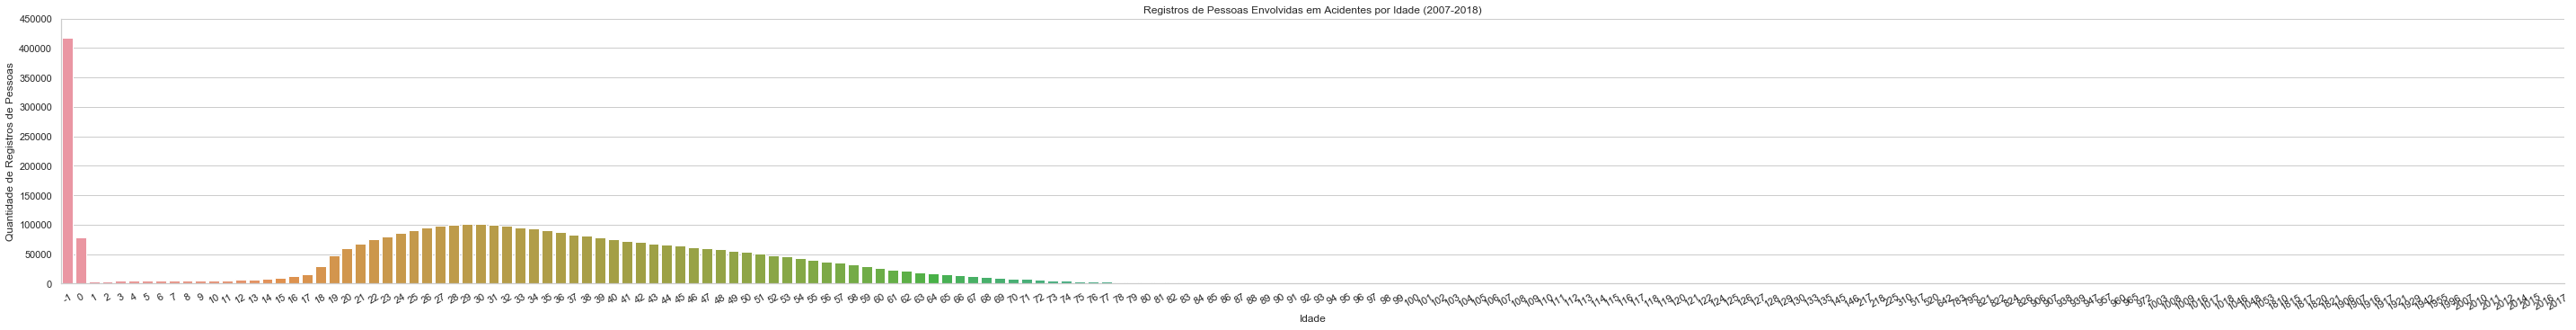

In [26]:
sns.set(style="whitegrid")
viz4_1 = sns.catplot(kind="bar", 
                   x='idade',
                   y='qtd_acidentes', 
                   data=df_aci_oco4_grpb_age, 
                   aspect=8.0,
                   height=5)
viz4_1.ax.set_title("Registros de Pessoas Envolvidas em Acidentes por Idade (2007-2018)")
viz4_1.set_axis_labels("Idade","Quantidade de Registros de Pessoas")
viz4_1.set(ylim=(0,450000))
viz4_1.set_xticklabels(rotation=30)
viz4_1.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz4_1.svg")

### 4.2 Registros de Pessoas Envolvidas em Acidentes Agrupados por Idade, a Cada Ano

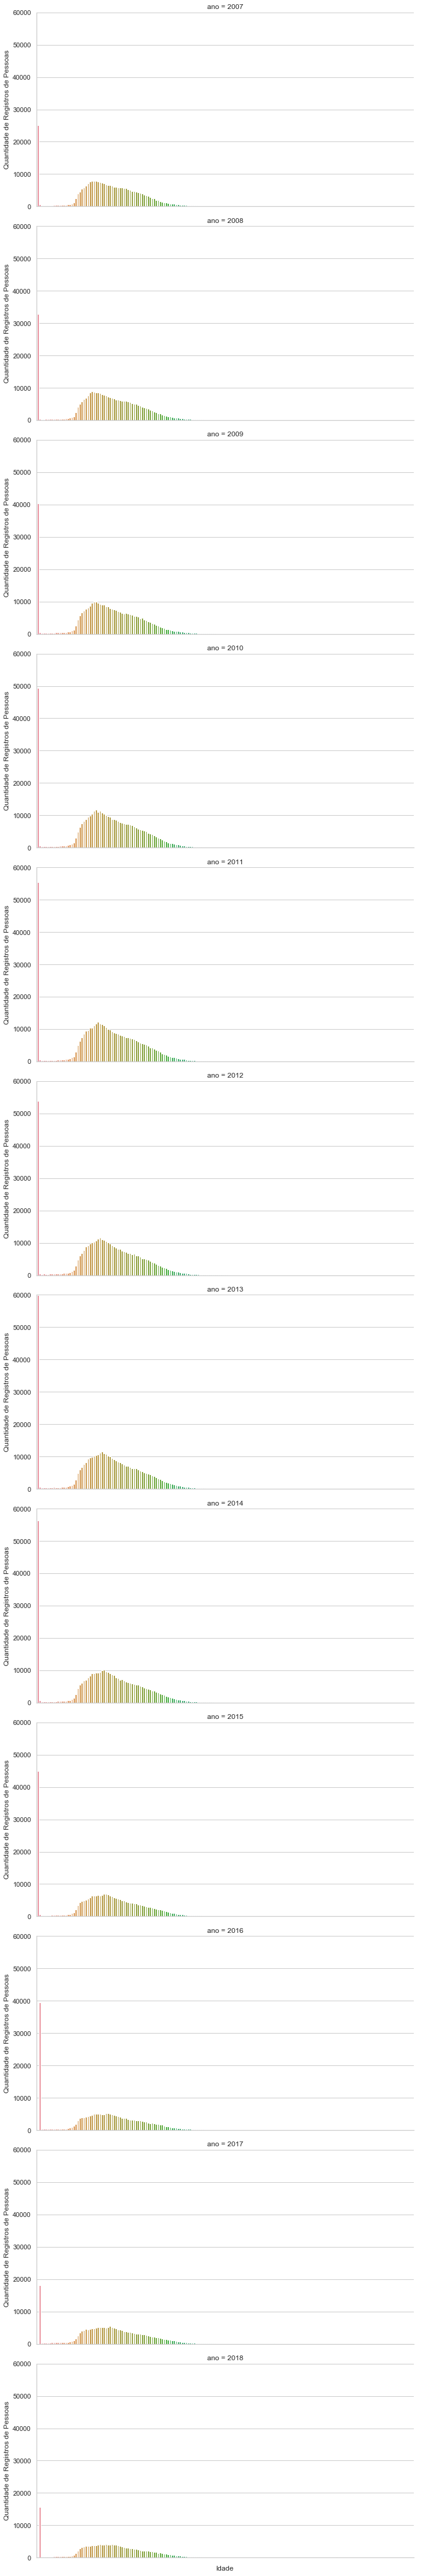

In [33]:
sns.set(style="whitegrid")
viz4_2 = sns.catplot(kind="bar", 
                   x='idade',
                   y='qtd_acidentes', 
                   data=df_aci_oco4, 
                   row="ano",
                   aspect=2.0,
                   height=5)
#viz4_2.ax.set_title("Registros de Pessoas Envolvidas em Acidentes por Idade (2007-2018)")
viz4_2.set_axis_labels("Idade","Quantidade de Registros de Pessoas")
viz4_2.set(ylim=(0,60000))
viz4_2.set_xticklabels(rotation=30)
viz4_2.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz4_2.svg")

### 4.3 Registros de Pessoas Envolvidas em Acidentes Agrupados por Idade Acima da Média (2007-2018)

In [85]:
age_minus_one = df_aci_oco4.idade==-1
age_zero = df_aci_oco4.idade==0
df_aci_oco4 = df_aci_oco4[~age_minus_one]
df_aci_oco4 = df_aci_oco4[~age_zero]
amount_age_abv_avg = df_aci_oco4.qtd_acidentes>df_aci_oco4.qtd_acidentes.mean()
df_aci_oco4_age_abv_avg = df_aci_oco4[amount_age_abv_avg]

C:\Users\B206348047\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



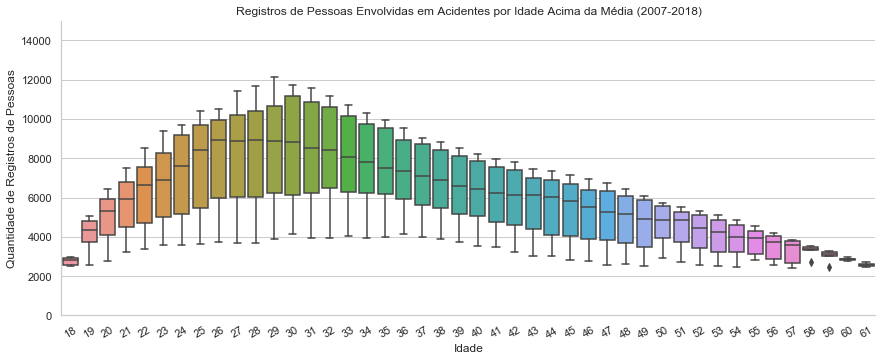

In [94]:
sns.set(style="whitegrid")
viz4_3 = sns.catplot(kind="box", 
                   x='idade',
                   y='qtd_acidentes', 
                   data=df_aci_oco4_age_abv_avg, 
                   aspect=2.5,
                   height=5)
viz4_3.ax.set_title("Registros de Pessoas Envolvidas em Acidentes por Idade Acima da Média (2007-2018)")
viz4_3.set_axis_labels("Idade","Quantidade de Registros de Pessoas")
viz4_3.set(ylim=(0,15000))
viz4_3.set_xticklabels(rotation=30)
viz4_3.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz4_3.svg")

## 5. Quais Marcas de Automóveis Registraram mais Ocorrências de Acidentes entre 2007-2018?

In [158]:
sql5 = """select date_part('year',acip.datahora) as ano, acip.marca as marca, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
group by ano, marca
order by ano, qtd_acidentes desc;"""

df_aci_oco5 = pd.read_sql_query(sql5, con=conn)
df_aci_oco5['ano'] = df_aci_oco5['ano'].astype('int64')

### 5.1 Registros Acima da Média entre 2007-2018 (10 Maiores):

In [159]:
df_aci_oco5=df_aci_oco5.dropna()
mean_brand_aci = df_aci_oco5.qtd_acidentes.mean()
df_aci_oco5_abv_mean_brand_aci=df_aci_oco5.qtd_acidentes>mean_brand_aci
df_aci_oco5_abv_mean_brand_aci=df_aci_oco5[df_aci_oco5_abv_mean_brand_aci]

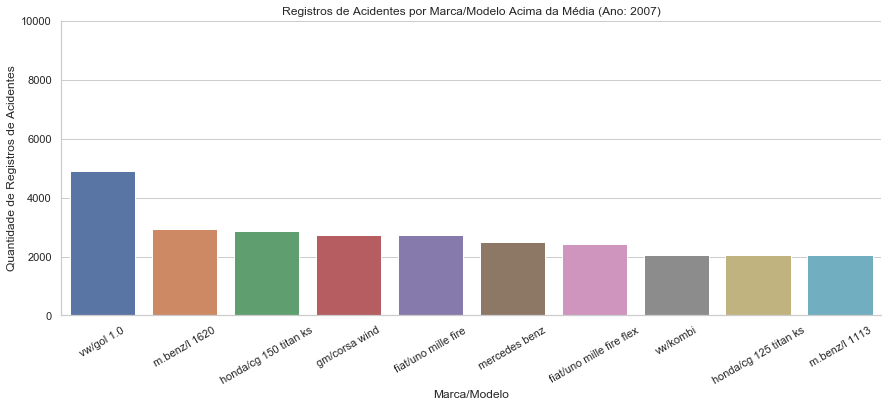

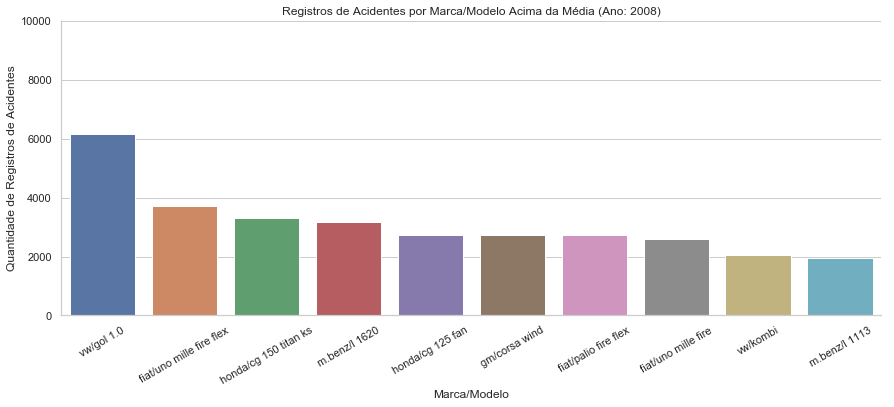

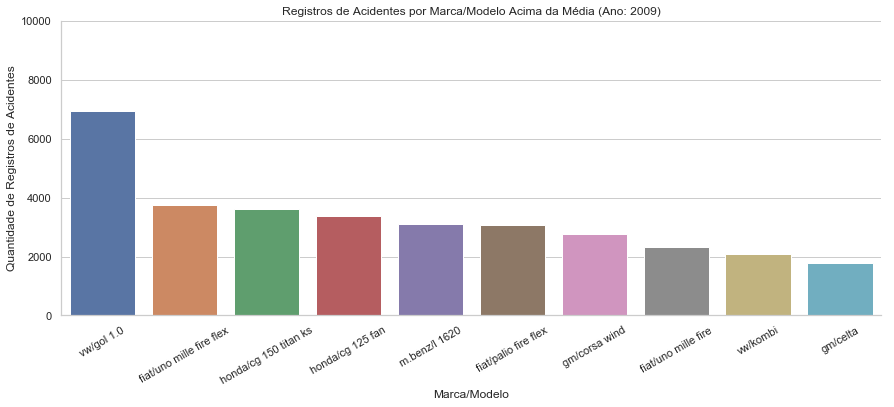

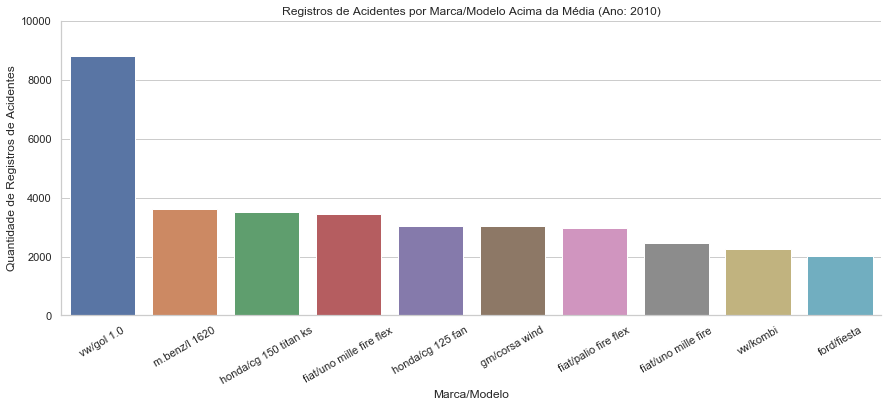

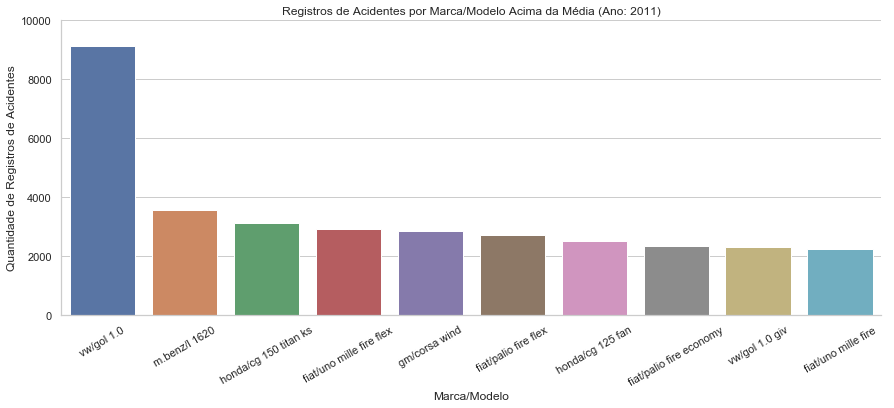

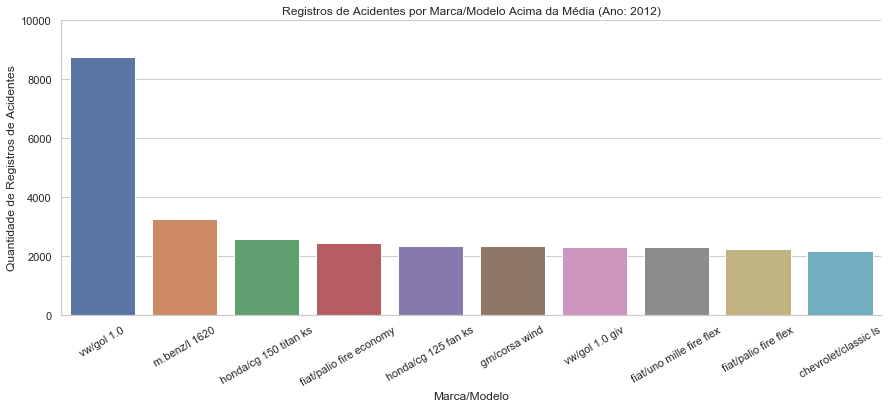

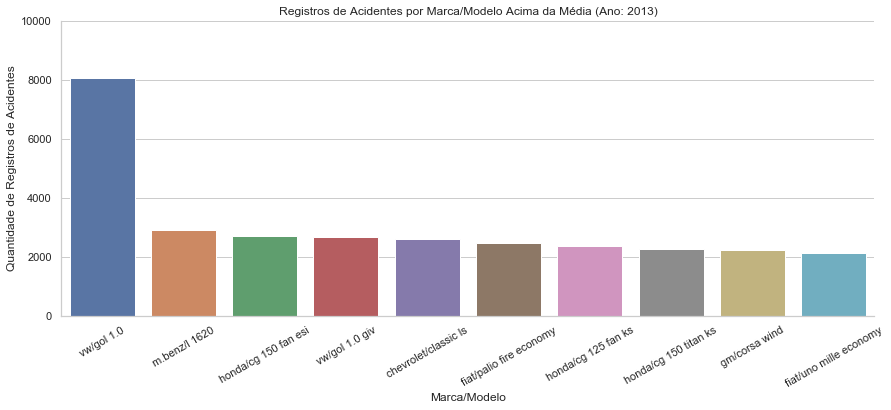

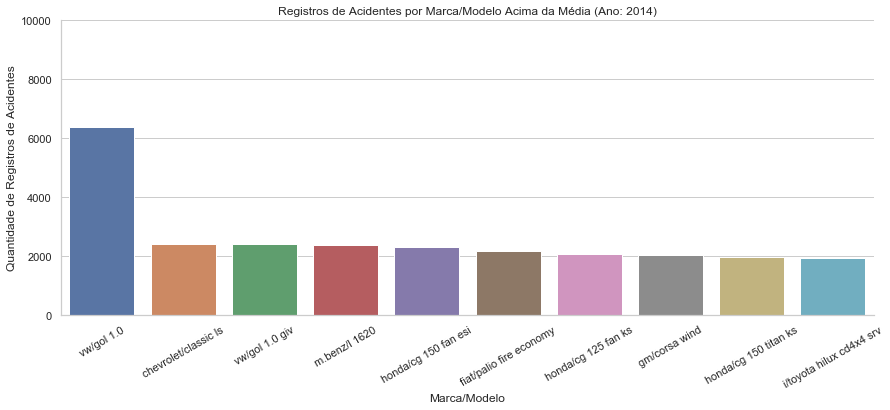

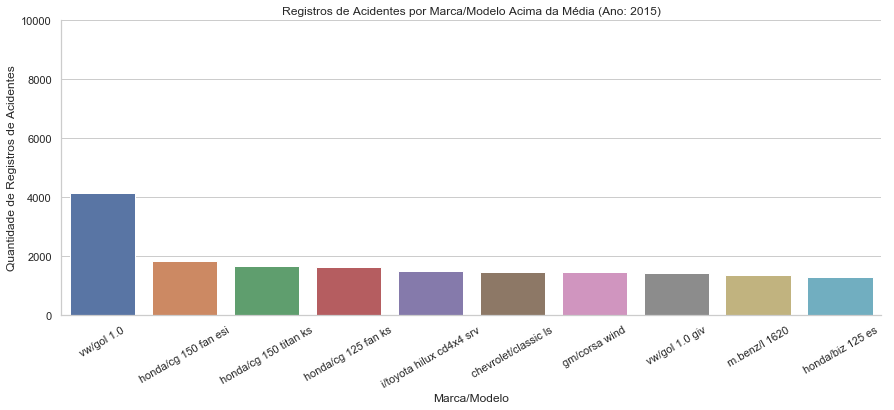

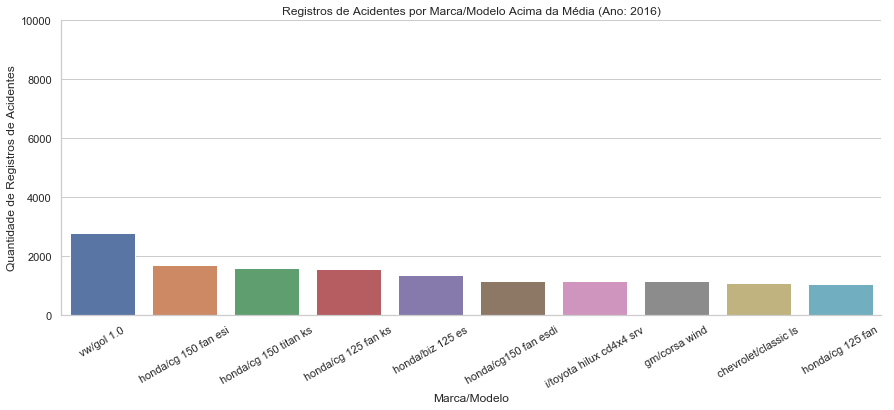

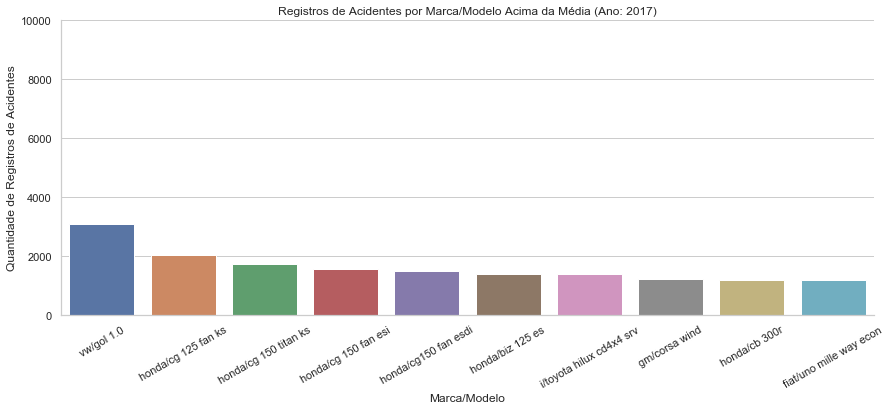

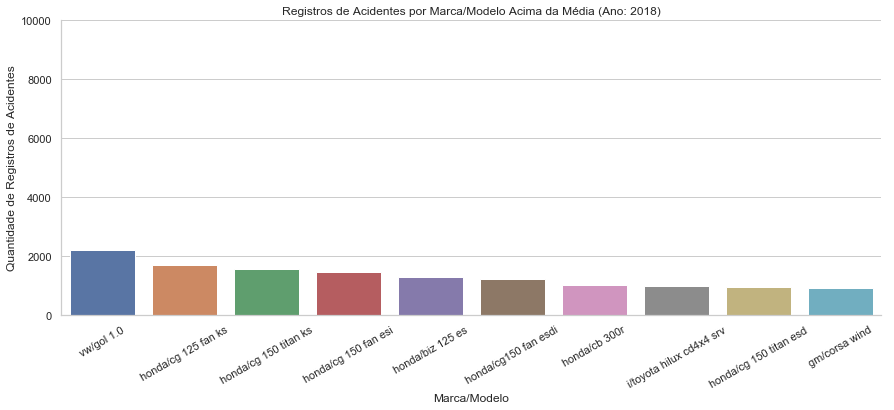

In [196]:
var_ano=range(2007,2019)
for each in var_ano:
    sns.set(style="whitegrid")
    viz5 = sns.catplot(kind="bar", 
                   x='marca',
                   y='qtd_acidentes', 
                   data=df_aci_oco5_abv_mean_brand_aci[df_aci_oco5_abv_mean_brand_aci.ano==each].head(10), 
                   aspect=2.5,
                   height=5)
    viz5.ax.set_title("Registros de Acidentes por Marca/Modelo Acima da Média (Ano: "+str(each)+")")
    viz5.set_axis_labels("Marca/Modelo","Quantidade de Registros de Acidentes")
    viz5.set(ylim=(0,10000))
    viz5.set_xticklabels(rotation=30)
    viz5.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz5_"+str(each)+".svg")

## 6. Quais Municípios Registraram mais Ocorrências de Acidentes entre 2007-2018?

In [218]:
sql6 = """select date_part('year',acip.datahora) as ano, acip.municipio as municipio, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
group by ano, municipio
order by ano, qtd_acidentes desc;"""

df_aci_oco6 = pd.read_sql_query(sql6, con=conn)
df_aci_oco6['ano'] = df_aci_oco6['ano'].astype('int64')

### 6.1 Acumulado 2007-2018:

In [219]:
df_aci_oco6=df_aci_oco6.replace("null",np.nan)
df_aci_oco6=df_aci_oco6.dropna()
df_aci_oco6_gp_mun=df_aci_oco6.groupby("municipio").agg("qtd_acidentes").sum().reset_index()
df_aci_oco6_gp_mun=df_aci_oco6_gp_mun.sort_values(by="qtd_acidentes",ascending=False).head(10)

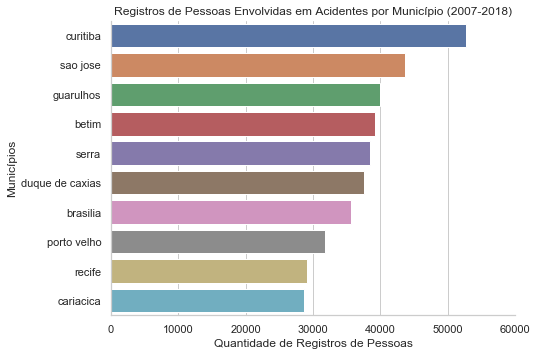

In [224]:
sns.set(style="whitegrid")
viz6_1 = sns.catplot(kind="bar", 
                   x='qtd_acidentes',
                   y='municipio', 
                   data=df_aci_oco6_gp_mun, 
                   aspect=1.5,
                   height=5)
viz6_1.ax.set_title("Registros de Pessoas Envolvidas em Acidentes por Município (2007-2018)")
viz6_1.set_axis_labels("Quantidade de Registros de Pessoas","Municípios")
viz6_1.set(xlim=(0,60000))
#viz6_1.set_xticklabels(rotation=30)
viz6_1.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz6_1.svg")

### 6.2 A cada Ano (2007-2018):

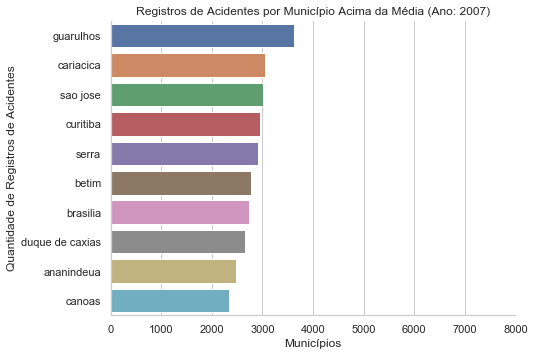

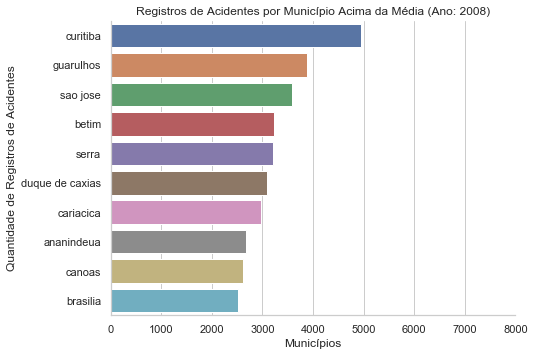

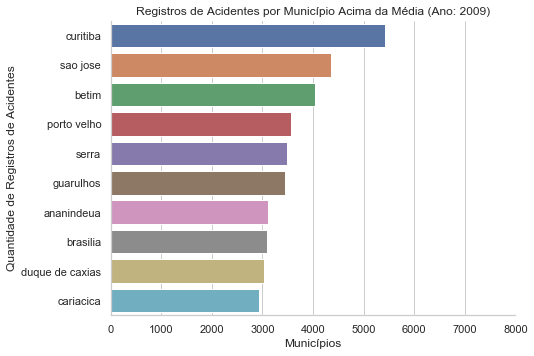

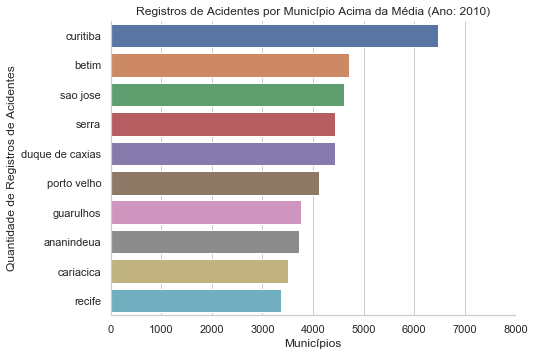

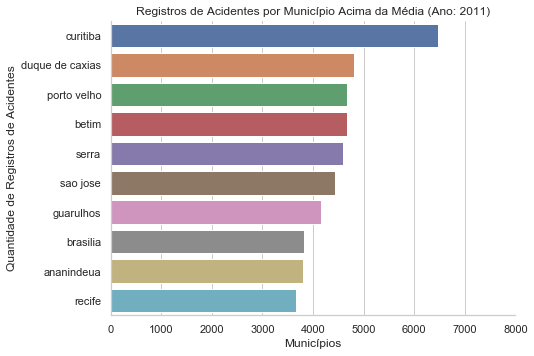

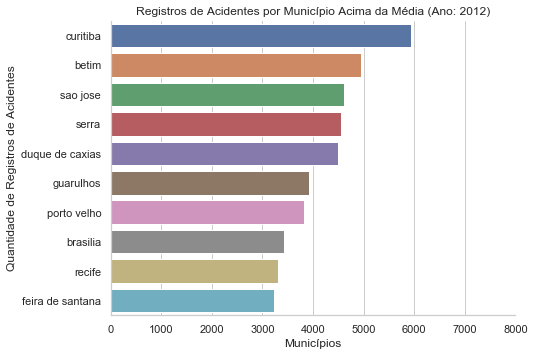

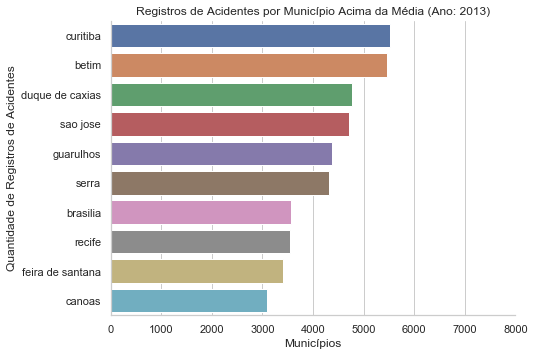

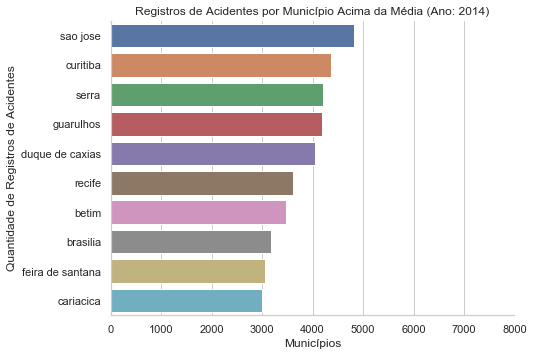

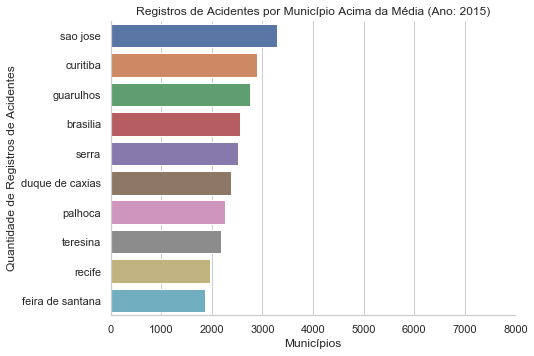

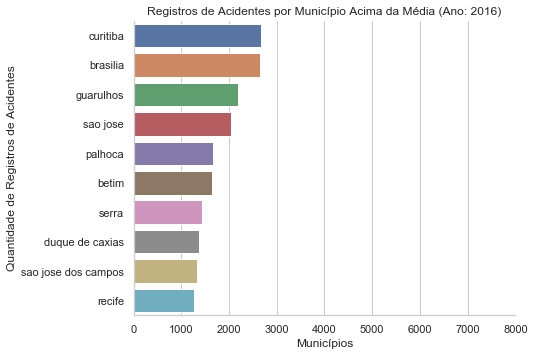

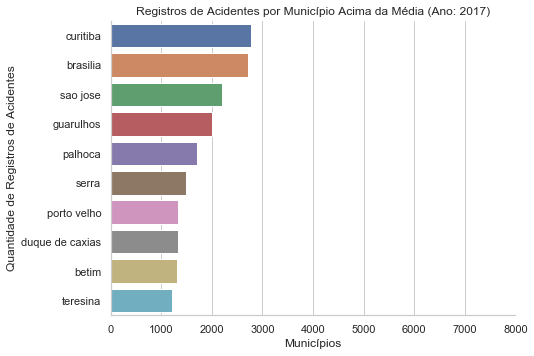

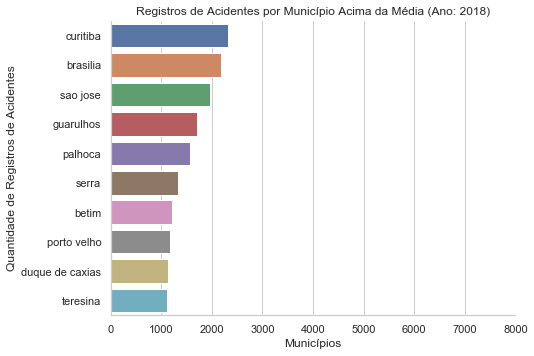

In [231]:
mean_brand_aci = df_aci_oco6.qtd_acidentes.mean()
df_aci_oco6_abv_mean_town_aci=df_aci_oco6.qtd_acidentes>mean_brand_aci
df_aci_oco6_abv_mean_town_aci=df_aci_oco6[df_aci_oco6_abv_mean_town_aci]
var_ano=range(2007,2019)
for each in var_ano:
    sns.set(style="whitegrid")
    viz6_2 = sns.catplot(kind="bar", 
                   x='qtd_acidentes',
                   y='municipio', 
                   data=df_aci_oco6_abv_mean_town_aci[df_aci_oco6_abv_mean_town_aci.ano==each].head(10), 
                   aspect=1.5,
                   height=5)
    viz6_2.ax.set_title("Registros de Acidentes por Município Acima da Média (Ano: "+str(each)+")")
    viz6_2.set_axis_labels("Municípios","Quantidade de Registros de Acidentes")
    viz6_2.set(xlim=(0,8000))
    #viz6_2.set_xticklabels(rotation=30)
    viz6_2.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz6_2_"+str(each)+".svg")

## 7. Quais Nacionalidades Registraram mais Ocorrências (2007-2018)


### 7.1 Análise de Registros Nulos

In [232]:
sql7_1 = """select date_part('year',acip.datahora) as ano, acip.nacionalidade as nacionalidade, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
where acip.nacionalidade is null
group by ano, nacionalidade
order by ano, qtd_acidentes desc;"""

df_aci_oco7_1 = pd.read_sql_query(sql7_1, con=conn)
df_aci_oco7_1['ano'] = df_aci_oco7_1['ano'].astype('int64')

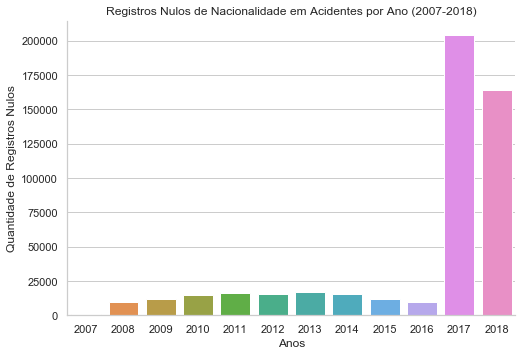

In [238]:
sns.set(style="whitegrid")
viz7_1 = sns.catplot(kind="bar", 
                   x='ano',
                   y='qtd_acidentes', 
                   data=df_aci_oco7_1, 
                   aspect=1.5,
                   height=5)
viz7_1.ax.set_title("Registros Nulos de Nacionalidade em Acidentes por Ano (2007-2018)")
viz7_1.set_axis_labels("Anos","Quantidade de Registros Nulos")
#viz7_1.set(xlim=(0,20000))
#viz6_1.set_xticklabels(rotation=30)
viz7_1.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz7_1.svg")

Através do gráfico 7.1 é possível observar que a quantidade de registros do tipo Nacionalidade aumentou de maneira discrepante no ano de 2017 em relação ao de 2016, e apesar de cair em 2018, ainda é um valor 16.53 vezes maior que registrado no ano de 2016.

Isto é um indicador importante que está se perdendo nos últimos 2 anos da série, apesar de o maior número ser de brasileiros, o registro bem estruturado de outras nacionalidades pode contribuir para melhores políticas de acordos entre os países que fazem fronteira com o Brasil, e em estações de maior turismo, podendo promover uma melhor estruturação de operações em rodovias.

### 7.2 Por Nacionalidade Estrangeira Acima da Média (Acumulado 2007-2018):

In [267]:
sql7_2 = """select date_part('year',acip.datahora) as ano, acip.nacionalidade as nacionalidade, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
group by ano, nacionalidade
order by ano, qtd_acidentes desc;"""

df_aci_oco7_2 = pd.read_sql_query(sql7_2, con=conn)
df_aci_oco7_2['ano'] = df_aci_oco7_2['ano'].astype('int64')

In [296]:
df_aci_oco7_2=df_aci_oco7_2.dropna()
df_aci_oco7_2=df_aci_oco7_2[df_aci_oco7_2.nacionalidade!="brasil"]
mean_brand_aci = df_aci_oco7_2.qtd_acidentes.mean()
df_aci_oco7_2_abv_mean_nac_aci=df_aci_oco7_2.qtd_acidentes>mean_brand_aci
df_aci_oco7_2_abv_mean_nac_aci=df_aci_oco7_2[df_aci_oco7_2_abv_mean_nac_aci]
df_aci_oco7_2_abv_mean_nac_aci=df_aci_oco7_2_abv_mean_nac_aci.groupby("nacionalidade").agg("qtd_acidentes").sum().reset_index()
df_aci_oco7_2_abv_mean_nac_aci=df_aci_oco7_2_abv_mean_nac_aci.sort_values(by="qtd_acidentes",ascending=False)

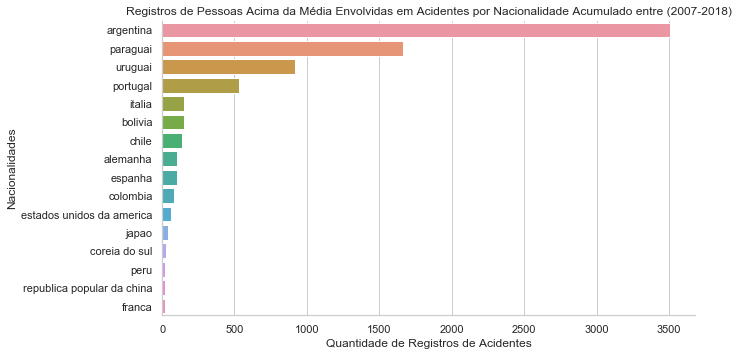

In [308]:
sns.set(style="whitegrid")
viz7_2 = sns.catplot(kind="bar", 
                   x='qtd_acidentes',
                   y='nacionalidade', 
                   data=df_aci_oco7_2_abv_mean_nac_aci, 
                   aspect=2.0,
                   height=5)
viz7_2.ax.set_title("Registros de Pessoas Acima da Média Envolvidas em Acidentes por Nacionalidade Acumulado entre (2007-2018)")
viz7_2.set_axis_labels("Quantidade de Registros de Acidentes","Nacionalidades")
viz7_2.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz7_2.svg")

Com o gráfico 7.2 fica muito clara a importância do registro correto de nacionalidades em acidentes, as 3 primeiras são de países que fazem não somente fronteira com o Brasil, também formam o MERCOSUL, detaque para Argentina que possui mais de 3000 registros de pessoas envolvidas em acidentes em rodovias federais no Brasil.

### 7.3 Por Nacionalidade Estrangeira Acima da Média (Comparação 2007-2016):

In [380]:
df_aci_oco7_2=df_aci_oco7_2.dropna()
df_aci_oco7_2=df_aci_oco7_2[df_aci_oco7_2.nacionalidade!="brasil"]
mean_brand_aci = df_aci_oco7_2.qtd_acidentes.mean()
df_aci_oco7_3_abv_mean_nac_aci=df_aci_oco7_2.qtd_acidentes>mean_brand_aci
df_aci_oco7_3_abv_mean_nac_aci=df_aci_oco7_2[df_aci_oco7_3_abv_mean_nac_aci]
df_aci_oco7_3_abv_mean_nac_aci=df_aci_oco7_3_abv_mean_nac_aci.groupby(["ano","nacionalidade"]).agg("qtd_acidentes").sum().reset_index()
df_aci_oco7_3_2007=df_aci_oco7_3_abv_mean_nac_aci.ano==2007
df_aci_oco7_3_2016=df_aci_oco7_3_abv_mean_nac_aci.ano==2016
df_aci_oco7_3_abv_mean_comp_nac_aci=df_aci_oco7_3_abv_mean_nac_aci[df_aci_oco7_3_2007]
df_aci_oco7_3_abv_mean_comp_nac_aci=df_aci_oco7_3_abv_mean_comp_nac_aci.append(df_aci_oco7_3_abv_mean_nac_aci[df_aci_oco7_3_2016])

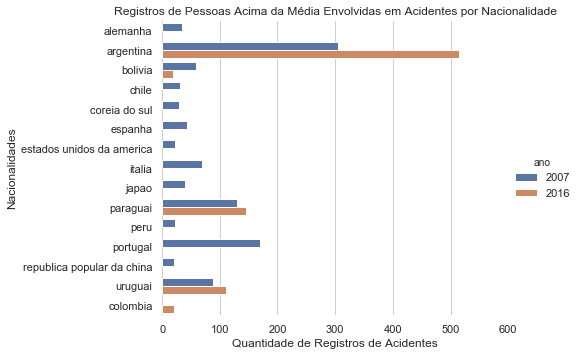

In [409]:
sns.set(style="whitegrid")
viz7_3 = sns.catplot(kind="bar", 
                   x='qtd_acidentes',
                   y='nacionalidade', 
                     hue="ano",
                     aspect=1.5,
                     height=5,
                   data=df_aci_oco7_3_abv_mean_comp_nac_aci)
viz7_3.ax.set_title("Registros de Pessoas Acima da Média Envolvidas em Acidentes por Nacionalidade")
viz7_3.set_axis_labels("Quantidade de Registros de Acidentes","Nacionalidades")
viz7_3.set(xlim=(0,600))
viz7_3.despine(left=True, bottom=True)
viz7_3.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz7_3.svg")

O gráfico 7.3 apresenta a comparação entre os anos de 2007 e 2016 dos países com número de pessoas envolvidas em acidentes em rodovias federais acima da média ao longo desse período. Esta visualização ressalta a observação realizada no item anterior (7.2), e corrobora que é preciso expandir em demais análises envolvendo as nacionalidades com os países do grupo MERCOSUL, já que todos os demais membros apresentaram aumento de registros nesta década de avaliação de dados.

## 8. Quais Naturalidades Registraram mais Ocorrências?(2007-2018)

### 8.1 Análise de Registros Nulos:

In [410]:
sql8_1 = """select date_part('year',acip.datahora) as ano, acip.naturalidade as naturalidade, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
where acip.naturalidade is null
group by ano, naturalidade
order by ano, qtd_acidentes desc;"""

df_aci_oco8_1 = pd.read_sql_query(sql8_1, con=conn)
df_aci_oco8_1['ano'] = df_aci_oco8_1['ano'].astype('int64')

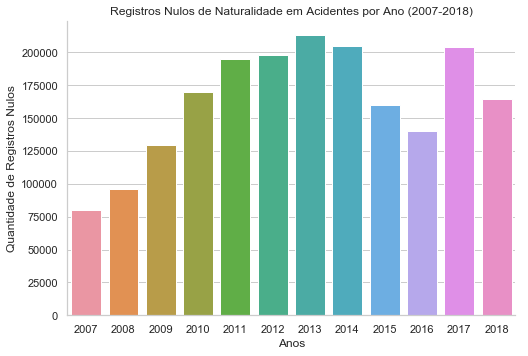

In [419]:
sns.set(style="whitegrid")
viz8_1 = sns.catplot(kind="bar", 
                   x='ano',
                   y='qtd_acidentes', 
                   data=df_aci_oco8_1, 
                   aspect=1.5,
                   height=5)
viz8_1.ax.set_title("Registros Nulos de Naturalidade em Acidentes por Ano (2007-2018)")
viz8_1.set_axis_labels("Anos","Quantidade de Registros Nulos")
#viz8_1.set(ylim=(0,215000))
#viz6_1.set_xticklabels(rotation=30)
viz8_1.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz8_1.svg")

Assim como no item 7.1, a quantidade de registros nulos para naturalidade é ainda mais alarmante, ao longo dos anos os valores nulos cresceram, e apesar da queda em 2015, registraram aumento significativo em 2017.

### 8.2 Por Naturalidade Acima da Média (Acumulado 2007-2018):

In [423]:
sql8_2 = """select acip.naturalidade as naturalidade, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
group by naturalidade
order by qtd_acidentes desc;"""

df_aci_oco8_2 = pd.read_sql_query(sql8_2, con=conn)
#df_aci_oco8_2['ano'] = df_aci_oco8_2['ano'].astype('int64')

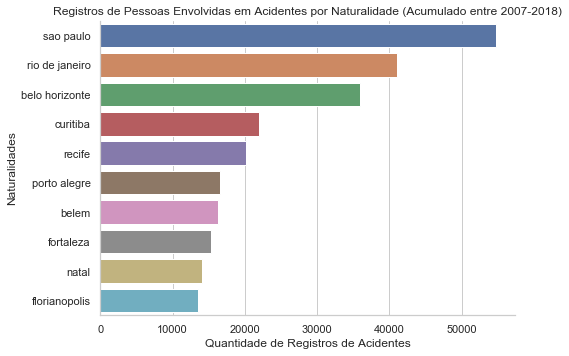

In [429]:
df_aci_oco8_2.dropna(inplace=True)
sns.set(style="whitegrid")
viz8_2 = sns.catplot(kind="bar", 
                   x='qtd_acidentes',
                   y='naturalidade', 
                   data=df_aci_oco8_2.head(10), 
                   aspect=1.5,
                   height=5)
viz8_2.ax.set_title("Registros de Pessoas Envolvidas em Acidentes por Naturalidade (Acumulado entre 2007-2018)")
viz8_2.set_axis_labels("Quantidade de Registros de Acidentes","Naturalidades")
viz8_2.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz8_2.svg")

O gráfico 8.2 apresenta uma quantidade de naturalidades referente às 10 mais registradas no período referente aos dados. É preciso expandir a análise em pelo menos uma pergunta: 
    * Quais municípios e estados estas naturalidades registraram as ocorrências?

## 9. Quais Sexos Registraram mais Ocorrências (2007-2018) (COMPARAR COM TIPO_ENVOLVIDO E QTD CNH POR SEXO)

### 9.1 Análise de Registros Nulos:

In [430]:
sql9_1 = """select date_part('year',acip.datahora) as ano, acip.sexo as sexo, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
where acip.sexo is null
group by ano, sexo
order by ano, qtd_acidentes desc;"""

df_aci_oco9_1 = pd.read_sql_query(sql9_1, con=conn)
df_aci_oco9_1['ano'] = df_aci_oco9_1['ano'].astype('int64')

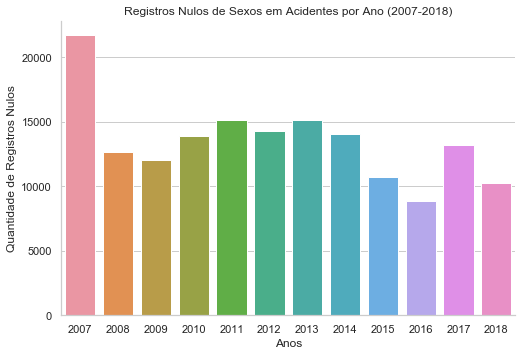

In [431]:
sns.set(style="whitegrid")
viz9_1 = sns.catplot(kind="bar", 
                   x='ano',
                   y='qtd_acidentes', 
                   data=df_aci_oco9_1, 
                   aspect=1.5,
                   height=5)
viz9_1.ax.set_title("Registros Nulos de Sexos em Acidentes por Ano (2007-2018)")
viz9_1.set_axis_labels("Anos","Quantidade de Registros Nulos")
#viz8_1.set(ylim=(0,215000))
#viz6_1.set_xticklabels(rotation=30)
viz9_1.savefig("./viz/figures/adv-pessoas-acidentes-prf/viz9_1.svg")

### 9.2 Comparação entre os Sexos:

In [441]:
sql9_2 = """select date_part('year',acip.datahora) as ano, acip.sexo as sexo, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
where acip.sexo is not null
group by ano, sexo
order by ano, qtd_acidentes desc;"""

df_aci_oco9_2 = pd.read_sql_query(sql9_2, con=conn)
df_aci_oco9_2['ano'] = df_aci_oco9_2['ano'].astype('int64')

In [446]:
df_aci_oco9_2.iplot(kind='scatter',
                   x="ano",
                   y="qtd_acidentes",
                   categories="sexo",
                   title="Quantidade de Acidentes por Sexo entre 2007-2018",
                   xrange=(2007,2018),
                   filename='cufflinks/simple-scatter')

## 10. Quais tipos de Pista Registraram mais Ocorrências entre 2007-2018?

In [447]:
sql10 = """select date_part('year',acip.datahora) as ano, acip.tipo_pista as tipo_de_pista, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
where acip.tipo_pista is not null
group by ano, tipo_de_pista
order by ano, qtd_acidentes desc;"""

df_aci_oco10 = pd.read_sql_query(sql10, con=conn)
df_aci_oco10['ano'] = df_aci_oco10['ano'].astype('int64')

In [448]:
df_aci_oco10.iplot(kind='scatter',
                   x="ano",
                   y="qtd_acidentes",
                   categories="tipo_de_pista",
                   title="Quantidade de Acidentes por Tipo de Pista entre 2007-2018",
                   xrange=(2007,2018),
                   filename='cufflinks/simple-scatter')

Vale analisar mais afundo quais os tipos de acidentes mais registrados em cada tipo de pista, já que espantosamente o tipo de pista simples possui a maior quantidade de registros.

## 11. Quais Tipos de Veículos Registraram mais Ocorrências entre 2007-2018?

In [449]:
sql11 = """select  date_part('year',acip.datahora) as ano, acip.tipo_veiculo as tipo_de_veiculo, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
where acip.tipo_veiculo is not null
group by ano, tipo_de_veiculo
order by ano, qtd_acidentes desc;"""

df_aci_oco11 = pd.read_sql_query(sql11, con=conn)
df_aci_oco11['ano'] = df_aci_oco11['ano'].astype('int64')

In [450]:
df_aci_oco11.iplot(kind='scatter',
                   x="ano",
                   y="qtd_acidentes",
                   categories="tipo_de_veiculo",
                   title="Quantidade de Acidentes por Tipo de Veículo entre 2007-2018",
                   xrange=(2007,2018),
                   filename='cufflinks/simple-scatter')

Estes dados precisam ser mais bem tratados e agrupados em categorias mais abrangentes, caminhonetes, utilitários e caminhoneta são tipos de automóveis, e podem responder algo significativo cruzando referências de venda de automóveis por tipo, já que na última década houve um aparente crescimento de SUVs e caminhonetes para fins particulares.

## 12. Quais Traçados da Via Registraram mais Ocorrências entre 2007-2018?

In [451]:
sql12 = """select date_part('year',acip.datahora) as ano, acip.tracado_via as tracado_via, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
group by ano, tracado_via
order by ano, qtd_acidentes desc;"""

df_aci_oco12 = pd.read_sql_query(sql12, con=conn)
df_aci_oco12['ano'] = df_aci_oco12['ano'].astype('int64')

In [452]:
df_aci_oco12.iplot(kind='scatter',
                   x="ano",
                   y="qtd_acidentes",
                   categories="tracado_via",
                   title="Quantidade de Acidentes por Tracado de Via entre 2007-2018",
                   xrange=(2007,2018),
                   filename='cufflinks/simple-scatter')

A partir de 2017 os dados apresentam mais detalhes para investigação, anterior ao ano comentado, apenas existem relatos de traçados de tipo: reta, curva e cruzamento. 

Este gráfico 12 pode ser expandido com uma análise de pontos de radares e infrações, através de um mapa geolocalizado.

## 13. Quais Uso de Solo Registraram mais Ocorrências entre 2007-2018?

In [453]:
sql13 = """select date_part('year',acip.datahora) as ano, acip.uso_solo as uso_de_solo, count(acip.*) as qtd_acidentes
from adv.tb_acidentes_pessoa_prf as acip
group by ano, uso_de_solo
order by ano, qtd_acidentes desc;"""

df_aci_oco13 = pd.read_sql_query(sql13, con=conn)
df_aci_oco13['ano'] = df_aci_oco13['ano'].astype('int64')

In [454]:
df_aci_oco13.iplot(kind='scatter',
                   x="ano",
                   y="qtd_acidentes",
                   categories="uso_de_solo",
                   title="Quantidade de Acidentes por Uso de Solo entre 2007-2018",
                   xrange=(2007,2018),
                   filename='cufflinks/simple-scatter')

Estes dados apresentam uma demasiada confusão a partir do ano 2017, das categorias "urbano" e "rural", os valores passaram a "não" e "sim", não existindo até então, uma explicação através de um documento no site de download dos dados. 

Além disto, o ano de 2016 apresenta uma inversão nos dados quantitativos, indicando que houveram mais registros de acidentes em solo rural que em urbano, estes acidentes precisam ser investigados para descobrir localidade.

## 14. Heatmap Dados Geolocalizados 2017-2018

In [6]:
sql14 = """select date_part('year', aci_pe_prf.datahora) as event_year, date_part('month', aci_pe_prf.datahora) as event_month, aci_pe_prf.latitude, aci_pe_prf.longitude
from adv.tb_acidentes_pessoa_prf AS aci_pe_prf
where aci_pe_prf.geometry IS NOT NULL AND ST_Within(aci_pe_prf.geometry, (SELECT edterritorios_geometry
FROM spat.ed_territorios_paises AS spat_country
WHERE spat_country.edterritorios_codigo=1076));"""

df_aci_oco14 = pd.read_sql_query(sql14, con=conn)
df_aci_oco14['event_year'] = df_aci_oco14['event_year'].astype("int64")
df_aci_oco14['event_month'] = df_aci_oco14['event_month'].astype("int64")
df_aci_oco14_2018 = df_aci_oco14[df_aci_oco14['event_year']==2018]
df_aci_oco14_2017 = df_aci_oco14[df_aci_oco14['event_year']==2017]

In [14]:
heat_map_aci_oco = folium.Map(location=[-20.29, -44.64], tiles='stamentoner',
    zoom_start=4, control_scale=True)

mcg = folium.plugins.MarkerCluster(control=False)
heat_map_aci_oco.add_child(mcg)

minimap = MiniMap()
heat_map_aci_oco.add_child(minimap)

Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(heat_map_aci_oco)

# List comprehension to make out list of lists
heat_data_17 = [[row['latitude'],row['longitude']] for index, row in df_aci_oco14_2017.iterrows()]
heat_data_18 = [[row['latitude'],row['longitude']] for index, row in df_aci_oco14_2018.iterrows()]

HeatMap(heat_data_17).add_to(folium.FeatureGroup(name='Pessoas Envolvidas Acidentes Rodovias Federais 2017').add_to(heat_map_aci_oco))
HeatMap(heat_data_18).add_to(folium.FeatureGroup(name='Pessoas Envolvidas Acidentes Rodovias Federais 2018').add_to(heat_map_aci_oco))
folium.LayerControl(collapsed=False).add_to(heat_map_aci_oco)

heat_map_aci_oco.save("dataviz-prf-acidentes-pessoas-heatmap-acidentes-17-18.html")

["Heatmap com Dados de Acidentes por Pessoa entre 2017 e 2018"](./viz/html/dataviz-prf-acidentes-pessoas-heatmap-acidentes-17-18.html "Heatmap com Dados de Acidentes por Pessoa entre 2017 e 2018")

In [455]:
conn.close()